01 Data cleaning: WVS
==
The World Value Survey (WVS) is a large-scale, cross-national, and repeated cross-sectional longitudinal survey research programs. In the 40-years period 1981-2022 were 7 survey waves (every 5 years) conducted. WVS include a large number of repeated questions, which constitute a rich time-series data source. In our analysis we want to examine those questions that get influenced by gender biases.

However, the data source has three main issues that are solved in this notebook:
- **large-scale:** the openenig process of the 0.5GB sav-file consumes 3-10 min. and several GB RAM. To enhance the usability we will save a smaller subset  of selected countries, waves and questions.
- **inconsistency:** Not all gender related questions neither all countries occure in each survey wave consistently. For comparability we select only those questions, which were asked in all the relevant survey waves and chose those countries with least missed waves while still carrying the highest value potential.
- **response scales:** The response categories in the sav-file doesn't line up with the responses that could be answered in the survey. This will be identified and rescaled. All text answers will be replaced bei numerical values and all response scales will be ordered morally ascending.


# Download dataset
Go to the website https://www.worldvaluessurvey.org/WVSEVStrend.jsp and click in the section "WVS data download"
the "SPSS: WVS_Trend_1981_2022_v3.0 SPSS" link.
After downloading move the sav-file to the "data" folder of this repository.

# References
Haerpfer, C., Inglehart, R., Moreno, A., Welzel, C., Kizilova, K., Diez-Medrano J., M. Lagos, P. Norris, E. Ponarin & B. Puranen et al. (eds.). 2022. World Values Survey Trend File (1981-2022) Cross-National Data-Set. Madrid, Spain  &  Vienna,  Austria:  JD  Systems  Institute  &  WVSA Secretariat. Data File Version 2.0.0, doi:10.14281/18241.23

Load WVS data - this process might take a while


In [2]:
import pandas as pd
#file from: https://www.worldvaluessurvey.org/WVSEVStrend.jsp file: SPSS: WVS_Trend_1981_2022_v3.0 SPSS
dfWVS = pd.read_spss("..//data//WVS_trends_3_0.sav")  

# 1. Select waves
Since our second Data source starts in the 1990s and we want to include Germany what only got unified by then, we will start covering survey wave 3 until the latest 7.

# 2. Select questions

The WVS supplementary file "F00011424-Common_EVS_WVS_Dictionary_IVS.xlsx" provides an overview of all question items asked in the seven survey waves.

Gender related questions since WVS3:
- C001 "Jobs scarce: Men should have more right to a job than women (3 categories)" 
- D057 "Being a housewife just as fulfilling" 
- D059 "Men make better political leaders than women do" 
- D060 "University is more important for a boy than for a girl" 
- E069_15 "Confidence: The Women´s Movement"

Indirect related questions since WVS3:
- D054 "One of main goals in life has been to make my parents proud"
- F063 "How important is God in your life"
- F119 "Justifiable: Prostitution"
- F120 "Justifiable: Abortion"
- F121 "Justifiable: Divorce"
- E035 "Income equality" (where sex is female)
- A173 "How much freedom of choice and control" (where sex is female)
- A003 "Important in life: Leisure time" (gap in sex)
- A008 "Feeling of happiness" (gap in sex)

Demographic questions since WVS3:
- G016	Language at home
- X001	Sex
- X002	Year of birth
- X003	Age
- X007	Marital status
- X011	How many children do you have
- X025CSWVS	Education (country specific) WVS
- X028	Employment status
- X040	Are you the chief wage earner in your house
- X044	Family savings during past year
- X045	Social class (subjective)
- X047_WVS	Subjective income level (10 categories) (WVS)
- X047R_WVS	Income level (3 categories) WVS
- X048ISO	Region where the interview was conducted (ISO)
- X048WVS	Region where the interview was conducted (WVS)
- X049	Size of town (8 categories)
- X049a	Size of town where interview was conducted (5 categories)
- X051	Ethnic group

Waves (S002/versn_w):
- '2017-2022'/'WVS7'
- '2010-2014'/'WVS6'
- '2005-2009'/'WVS5'
- '1999-2004'/'WVS4'
- '1994-1998'/'WVS3'
- '1989-1993'/'WVS2'
- '1981-1984'/'WVS1'

# 3. Select countries

The supplementary file does not tell wich country was covered by which survey wave.
Thus the availabilty gets calculated...

In [2]:
availability = pd.DataFrame(columns=['country', 'WVS1','WVS2','WVS3','WVS4','WVS5','WVS6','WVS7'])

for idCountry,country in enumerate(dfWVS.S003.unique()):
    availability.loc[len(availability)]=[country, 
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS1') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS2') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS3') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS4') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS5') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS6') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS7') & (dfWVS.S003==country)])>0 else '')   
                        ]              

In [3]:
print(availability.to_string())

                 country WVS1 WVS2 WVS3 WVS4 WVS5 WVS6 WVS7
0                Andorra                        x         x
1              Argentina    x    x    x    x    x    x    x
2              Australia    x         x         x    x    x
3             Bangladesh              x    x              x
4                Armenia              x              x    x
5                Bolivia                                  x
6                 Brazil         x    x         x    x    x
7                Albania              x    x               
8                Myanmar                                  x
9                Algeria                   x         x     
10                Canada                   x    x         x
11                 Chile         x    x    x    x    x    x
12                 China         x    x    x    x    x    x
13            Taiwan ROC              x         x    x    x
14              Colombia              x         x    x    x
15                Cyprus                

Let's look at the countries that attended all the waves from WVS3-WVS7...

In [4]:
print(availability[(availability.WVS3=='x')&(availability.WVS4=='x')&(availability.WVS5=='x')&(availability.WVS6=='x')&(availability.WVS7=='x')].to_string())

          country WVS1 WVS2 WVS3 WVS4 WVS5 WVS6 WVS7
1       Argentina    x    x    x    x    x    x    x
11          Chile         x    x    x    x    x    x
12          China         x    x    x    x    x    x
27          Japan    x    x    x    x    x    x    x
31    South Korea    x    x    x    x    x    x    x
38         Mexico    x    x    x    x    x    x    x
46           Peru              x    x    x    x    x
60         Turkey         x    x    x    x    x    x
64  United States              x    x    x    x    x


And the availability of all the promissing countries...

In [5]:
availability[(availability.country.isin(['Germany','China','Turkey','Nigeria','Peru','Iran','United States','Serbia', 'South Africa','Pakistan']))]

,country,WVS1,WVS2,WVS3,WVS4,WVS5,WVS6,WVS7
12,China,,x,x,x,x,x,x
19,Germany,,,x,,x,x,x
25,Iran,,,,x,x,,x
44,Nigeria,,x,x,x,,x,x
45,Pakistan,,,x,x,,x,x
46,Peru,,,x,x,x,x,x
51,Serbia,,,x,x,x,,x
60,Turkey,,x,x,x,x,x,x
64,United States,,,x,x,x,x,x
96,South Africa,x,x,x,x,x,x,


# 4. Filter subset 
We end up with the following filters for our subset:

In [6]:
list3Countries=['Germany','China','Turkey']
list5Countries=['Germany','China','Turkey','Nigeria','Peru']
list10Countries =['Germany','China','Turkey','Nigeria','Peru','Iran','United States','Serbia','South Africa','Pakistan']

In [7]:
listCountries = list10Countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']

listGenderQuestions = ['C001', 'D059', 'D060', 'E069_15', 'F120', 'F121', 'E035', 'A173']
listDemographicQuestions = ['X001', 'X003', 'X051', 'X007', 'X040', 'X049']
listIDColummns = ['versn_w', 'S002', 'S003', 'S007', 'S020']

#make the item names readable
mapColumns = {'C001': 'job', 'D059': 'politician', 'D060': 'university', 'E069_15': 'women_movement', 'F120': 'abortion', 
              'F121': 'divorce', 'E035': 'income_equality', 'A173': 'choice_control', 
              'X001': 'sex', 'X003': 'age', 'X051': 'ethnic', 'X007': 'status', 'X040': 'top_earner', 'X049': 'town_size', 
              'versn_w': 'wave', 'S002': 'wave_years', 'S003': 'country', 'S007': 'respondent_number', 'S020': 'year'}

In [8]:
#filtering
dfWVSFilterd = dfWVS[(dfWVS.versn_w.isin(listWaves)) & (dfWVS.S003.isin(listCountries))]
dfWVSFilterd = dfWVSFilterd[listIDColummns+listDemographicQuestions+listGenderQuestions]

#rename columns
dfWVSFilterd = dfWVSFilterd.rename(columns=mapColumns)

In [9]:
#make the item names readable
listGenderQuestions=[mapColumns.get(n, n) for n in listGenderQuestions]
listDemographicQuestions=[mapColumns.get(n, n) for n in listDemographicQuestions]
listIDColummns=[mapColumns.get(n, n) for n in listIDColummns]

# 5. Streamline responses
Replace text answers with numerical counterparts from questionaire

In [12]:
for genderQuestion in listGenderQuestions:
    print(genderQuestion+":")
    print(dfWVSFilterd[genderQuestion].unique().sort_values())
    print()

job:
['Agree', 'Disagree', 'Neither', NaN]
Categories (3, object): ['Agree', 'Disagree', 'Neither']

politician:
['Agree', 'Agree strongly', 'Disagree', 'Strongly disagree', NaN]
Categories (4, object): ['Agree', 'Agree strongly', 'Disagree', 'Strongly disagree']

university:
['Agree', 'Agree strongly', 'Disagree', 'Strongly disagree', NaN]
Categories (4, object): ['Agree', 'Agree strongly', 'Disagree', 'Strongly disagree']

women_movement:
['A great deal', 'None at all', 'Not very much', 'Quite a lot', NaN]
Categories (4, object): ['A great deal', 'None at all', 'Not very much', 'Quite a lot']

abortion:
['2', '3', '4', '5', '6', ..., '8', '9', 'Always justifiable', 'Never justifiable', NaN]
Length: 11
Categories (10, object): ['2', '3', '4', '5', ..., '8', '9', 'Always justifiable', 'Never justifiable']

divorce:
['2', '3', '4', '5', '6', ..., '8', '9', 'Always justifiable', 'Never justifiable', NaN]
Length: 11
Categories (10, object): ['2', '3', '4', '5', ..., '8', '9', 'Always just

In [13]:
print(listGenderQuestions)

# replace text answers with numeric ones, according F00011424-Common_EVS_WVS_Dictionary_IVS

# Please tell me for each of the following actions whether you think it is:
dfWVSFilterd['divorce'] = dfWVSFilterd['divorce'].replace("Never justifiable", 1)
dfWVSFilterd['divorce'] = dfWVSFilterd['divorce'].replace("Always justifiable", 10)

dfWVSFilterd['abortion'] = dfWVSFilterd['abortion'].replace("Never justifiable", 1)
dfWVSFilterd['abortion'] = dfWVSFilterd['abortion'].replace("Always justifiable", 10)


# how much confidence do you have in womens movement:
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("A great deal", 1)
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("Quite a lot", 2)
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("Not very much", 3)
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("None at all", 4)

 
#On the whole, men make better political leaders than women do ['Agree', 'Disagree', 'Agree strongly', NaN, 'Strongly disagree']
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Strongly agree", 1)
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Agree strongly", 1)
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Agree", 2)
#dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Neither", 3) # jibts net nur 4
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Disagree", 3)
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Disagree strongly", 4) 
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Strongly disagree", 4) 

# A university education is more important for a boy than for a girl ['Disagree', 'Strongly disagree', 'Agree', 'Agree strongly', NaN]
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Strongly agree", 1)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Agree strongly", 1)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Agree", 2)
#dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Neither", 3) #No Neither
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Disagree", 3)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Disagree strongly", 4) 
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Strongly disagree", 4) 

# When jobs are scarce, men should have more right to a job than women ['Agree', 'Neither', 'Disagree', NaN]
#dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Strongly agree", 1) #TODO check if exists
dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Agree", 1)
dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Neither", 2)
dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Disagree", 3)
#dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Strongly disagree", 5) # TODO check if exists


# Some people feel they have completely free choice and control over their lives, while other people
# feel that what they do has no real effect on what happens to them. 
# Please use this scale where 1 means "no choice at all" and 10 means "a great deal of choice" to indicate 
# how much freedom of choice and control you feel you have over the way your life turns out
dfWVSFilterd['choice_control'] = dfWVSFilterd['choice_control'].replace("No choice at all", 1)
dfWVSFilterd['choice_control'] = dfWVSFilterd['choice_control'].replace("None at all", 1)
dfWVSFilterd['choice_control'] = dfWVSFilterd['choice_control'].replace("A great deal", 10)

# How would you place your views on this scale? 1 means you agree completely with the statement on the left; 
# 10 means you agree completely with the statement on the right
dfWVSFilterd['income_equality'] = dfWVSFilterd['income_equality'].replace("Incomes should be made more equal", 1)
dfWVSFilterd['income_equality'] = dfWVSFilterd['income_equality'].replace("We need larger income differences as incentives", 10)

['job', 'politician', 'university', 'women_movement', 'abortion', 'divorce', 'income_equality', 'choice_control']


Invert some scales to make the results more intuitive.
So for every question the higher the number the more the agreement TOWARDS womens rights/gender equality.

In [14]:
# invert values
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace({1:4, 2:3, 3:2, 4:1})
dfWVSFilterd['income_equality'] = dfWVSFilterd['income_equality'].replace({1:10, 2:9, 3:8, 4:7, 5:6, 6:5, 7:4, 8:3, 9:2, 10:1})


# change values to numbers where possible
# drop rows with NAs 
cols = {'job', 'politician', 'university',  'women_movement', 'abortion', 'divorce', 'income_equality', 'choice_control'}
for col in cols:
    dfWVSFilterd = dfWVSFilterd.dropna(subset=[col])
    dfWVSFilterd[col] = dfWVSFilterd[col].astype(int)

Safe cleaned subset of WVS data into smaller csv-file for easier access/faster coding from here on

In [15]:
dfWVSFilterd.to_csv('..//data//WVS_cleaned_10.csv')

Barplots to check for data validity (no missing values, all options answered, similar distributions across answers)

In [5]:
#load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
subset = pd.read_csv('..//data//WVS_cleaned_10.csv')

([<matplotlib.axis.XTick at 0x2131ccf2990>,
 [Text(0, 0, 'Divorce'),
  Text(1, 0, 'Abortion'),
  Text(2, 0, 'Income Equality')])

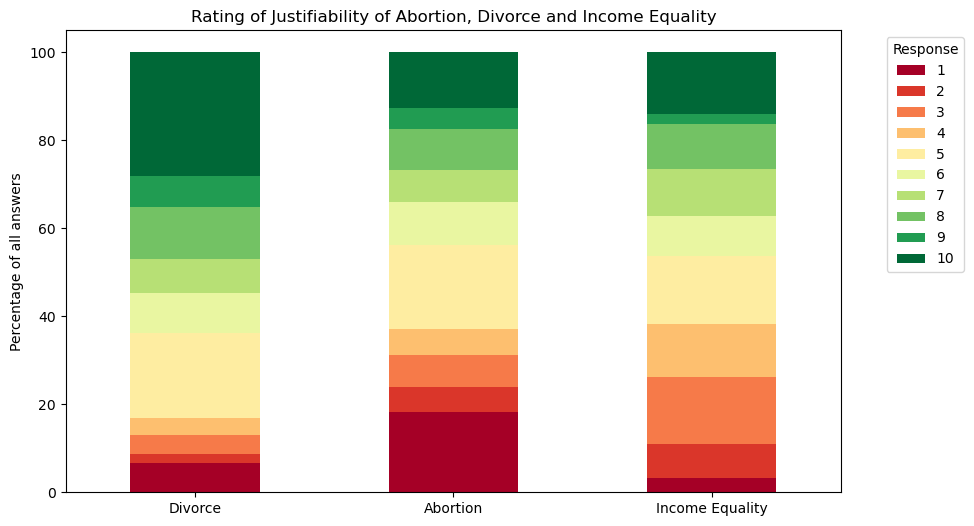

In [6]:
# stacked bar plots, ein plot pro country & frage, für alle waves

# germany only for fast testing
dfWVSger = subset[subset.country == 'Germany']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'], #choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Plot for '10_values' group
df_10_values = dfWVSger[grouped_variables['10_values']]
df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100) #normalize= true -> % instead of counting data points

# plot
ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
ax1.set_ylabel('Percentage of all answers')
#ax1.set_xlabel('Question')
ax1.set_title('Rating of Justifiability of Abortion, Divorce and Income Equality')

#TODO colourbar instead of legend maybr
#cax = plt.gcf().add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
#plt.colorbar(ax1.patches, ticks=np.linspace(0, 100, 10))  # Adjust ticks as needed
#cbar = plt.colorbar(ax1)
#cbar.set_label('X+Y')

ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')#, labels={"Never justifiable", "2", "3", "4", "5", "6", "7", "8", "9", "Always Justifiable"})
# TODO labels
plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

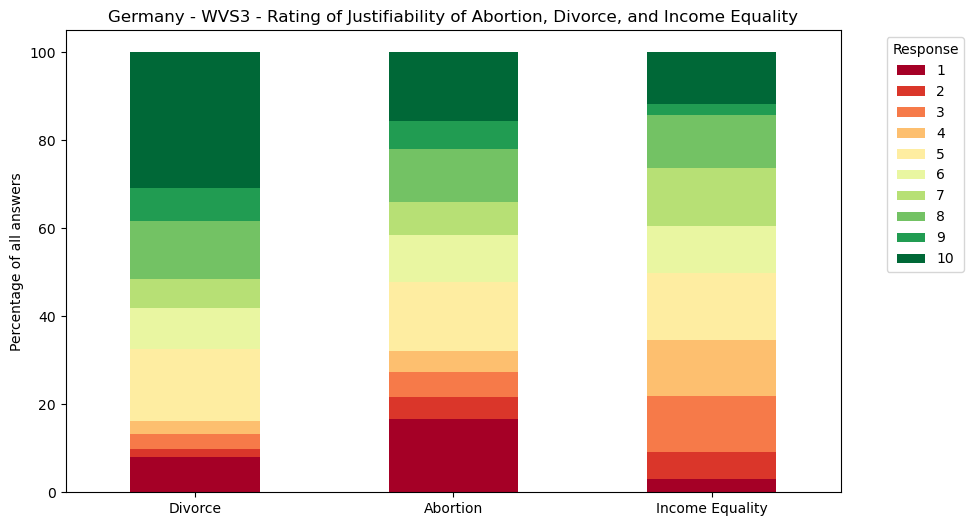

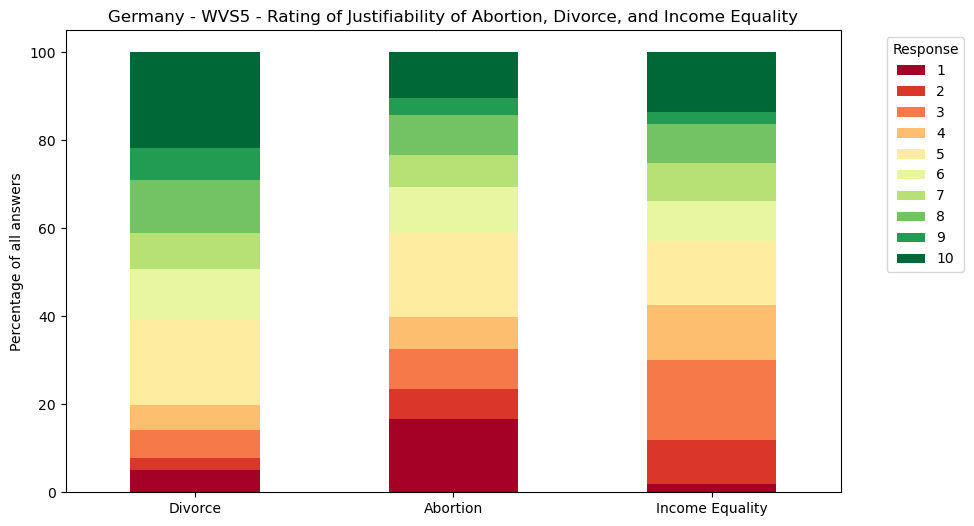

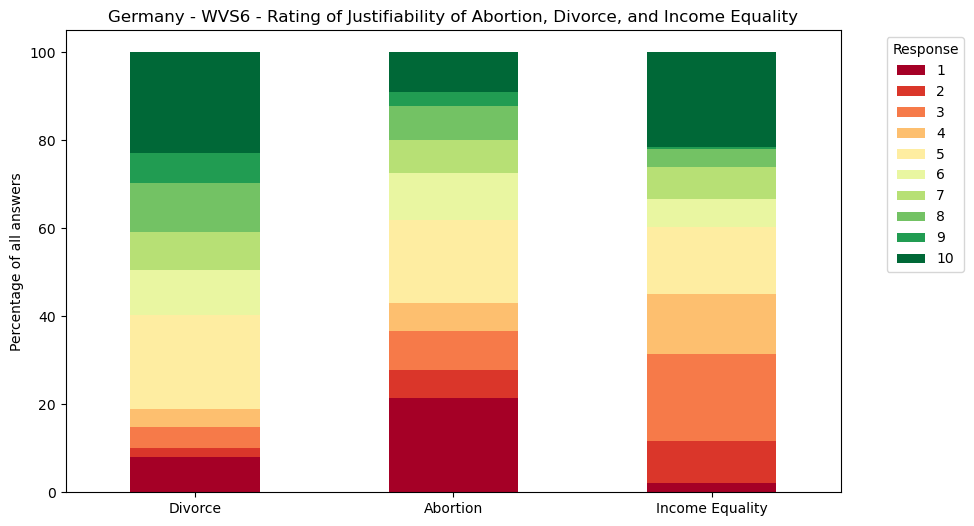

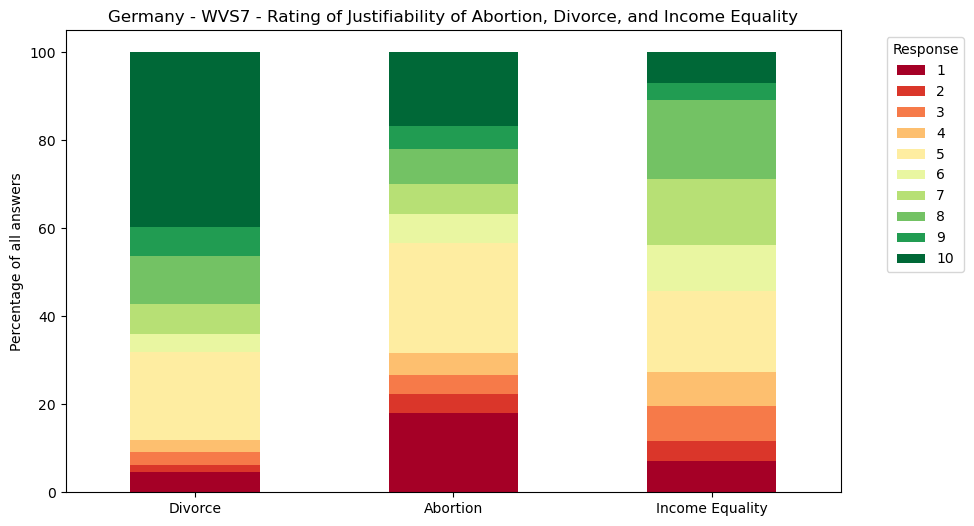

In [7]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Germany']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Germany - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


check for job politician and univseristy data

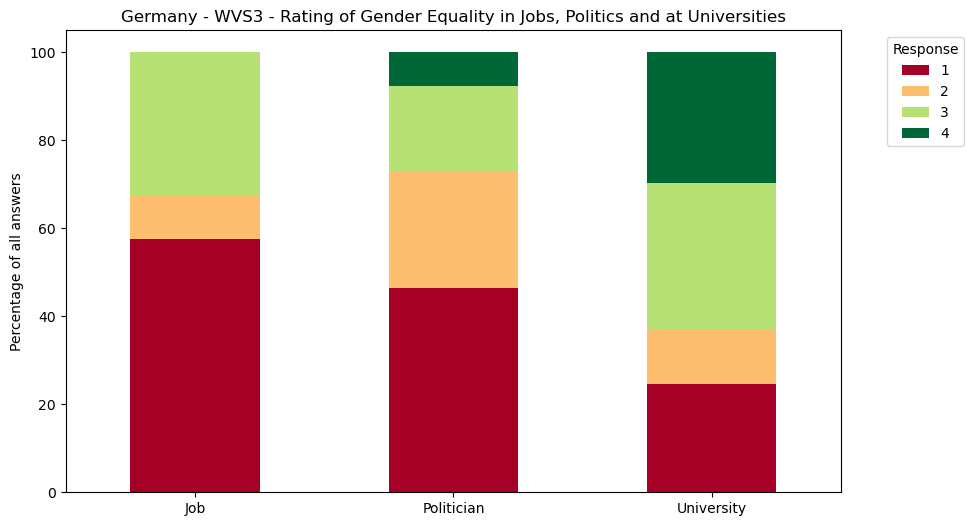

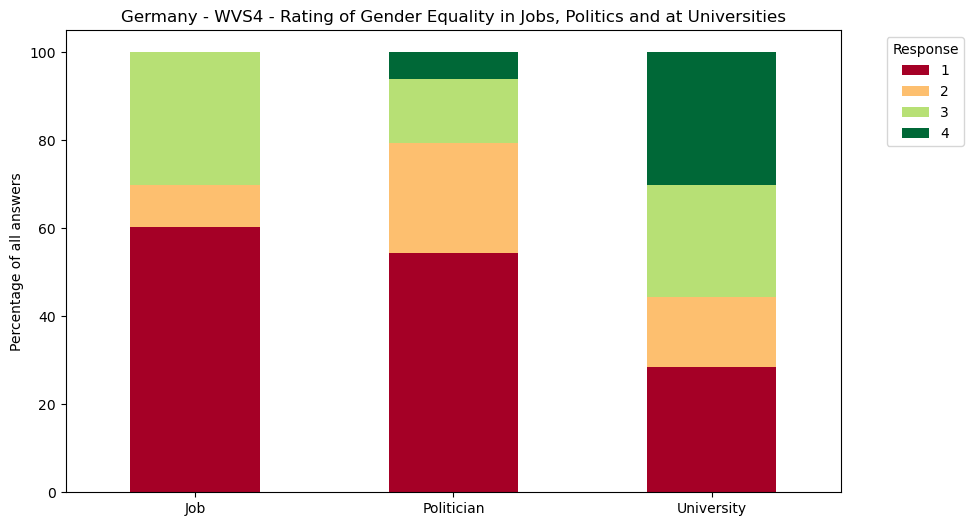

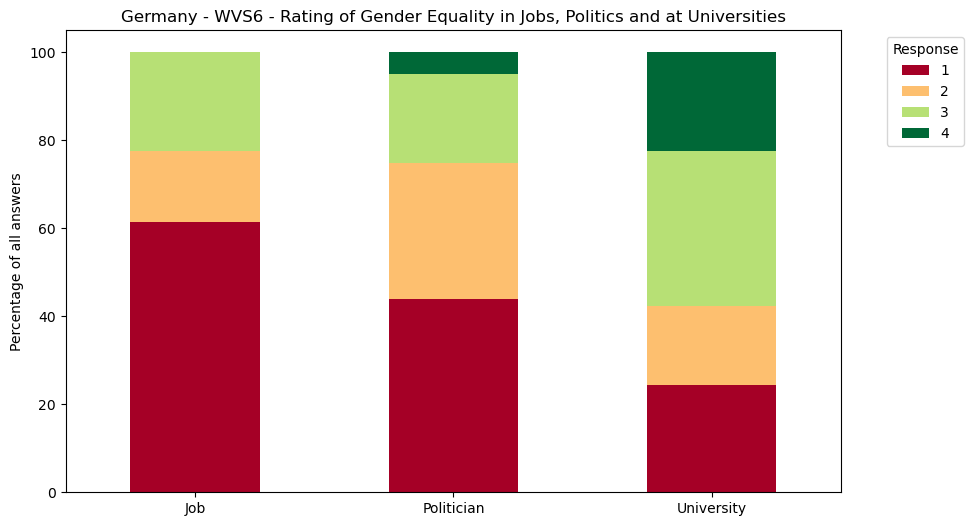

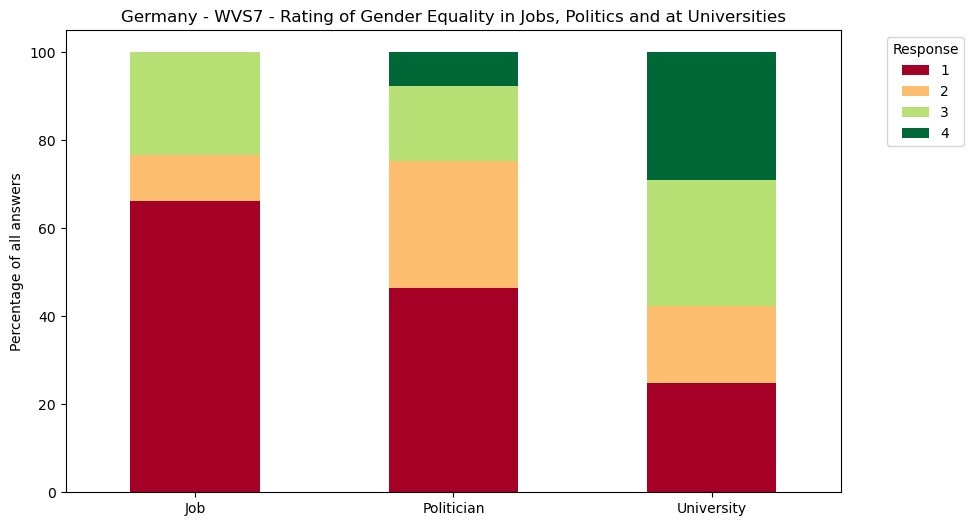

In [8]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Nigeria']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['5_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Germany - {wave} - Rating of Gender Equality in Jobs, Politics and at Universities')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Job", "Politician", "University"], rotation=0)

        # Show plot for each wave
        plt.show()

China

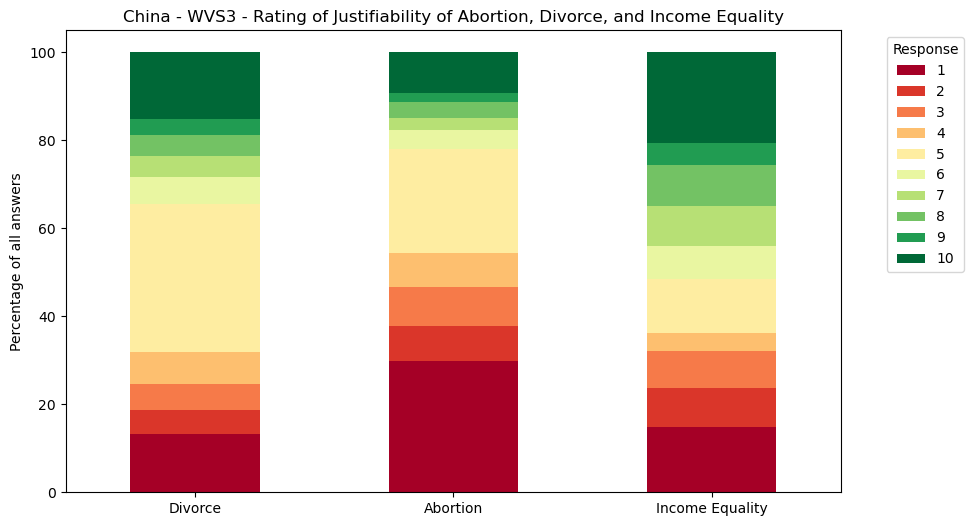

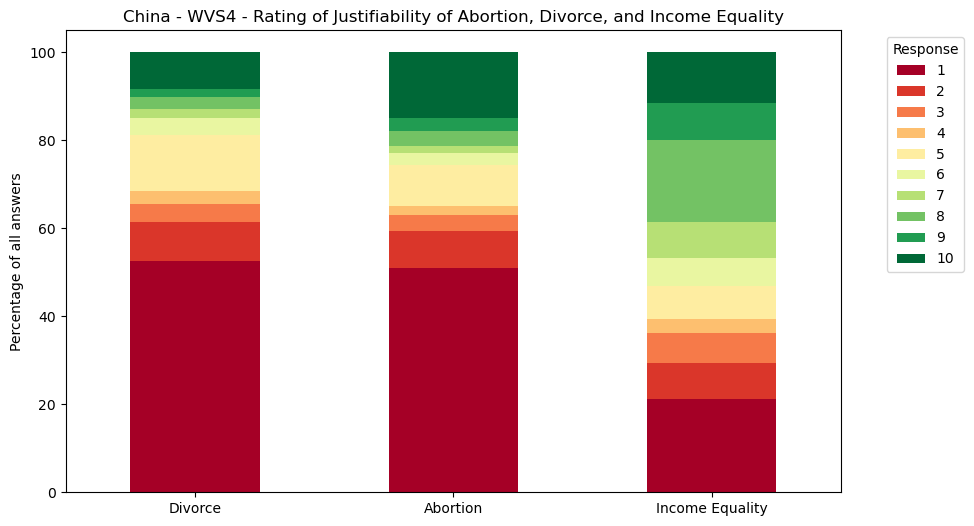

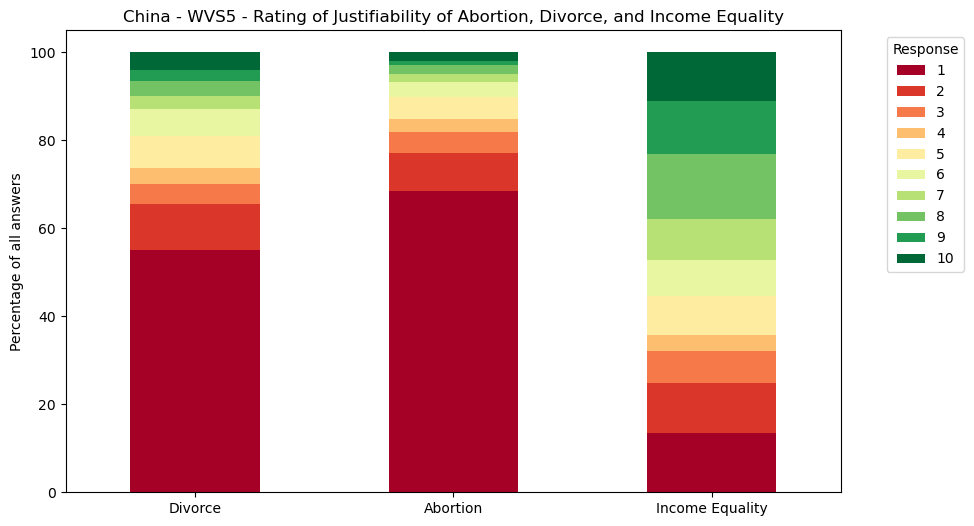

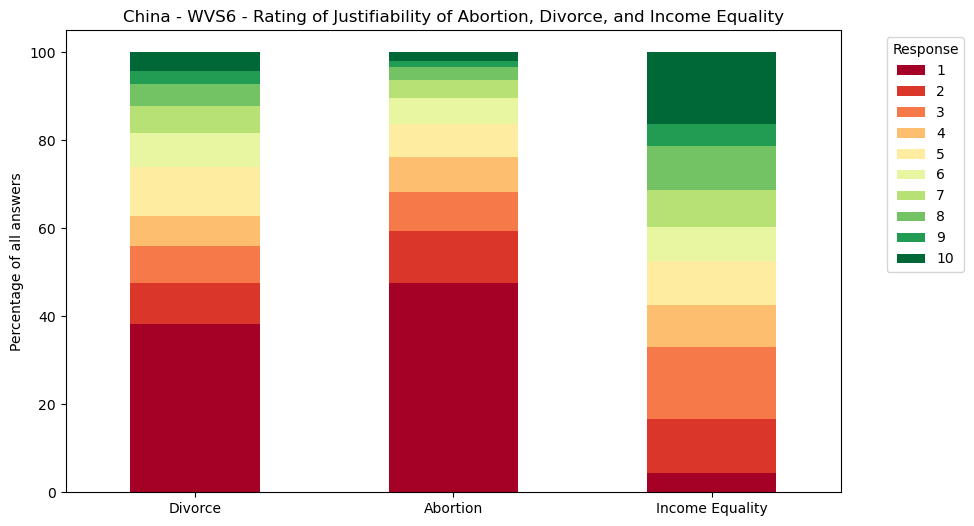

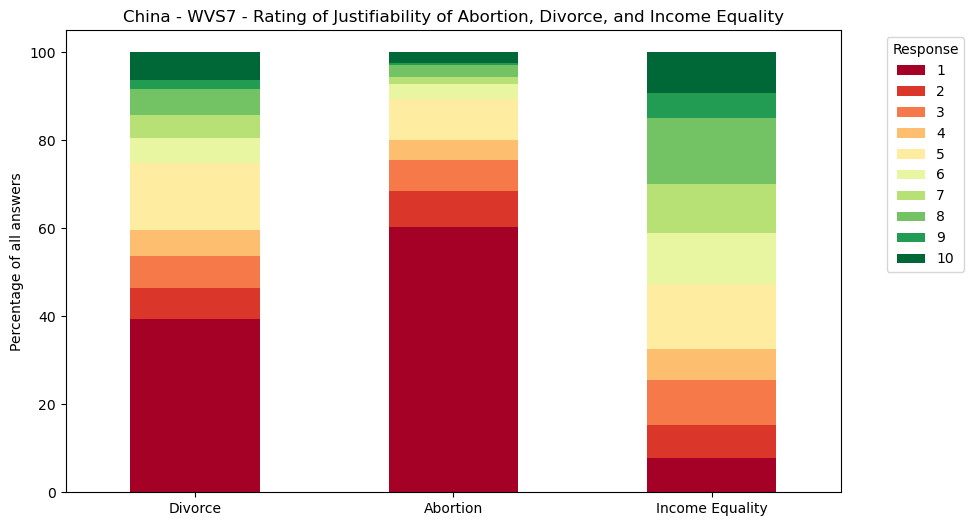

In [9]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'China']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'China - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


Turkey

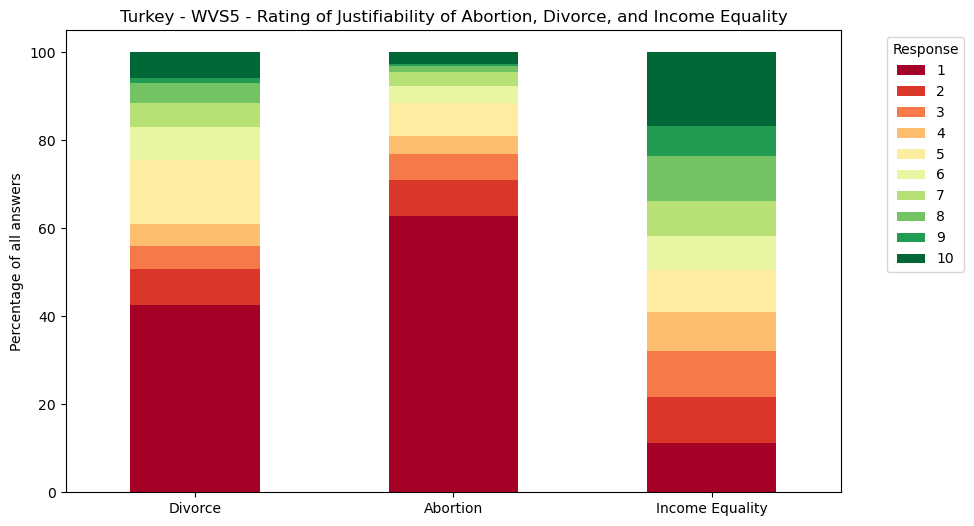

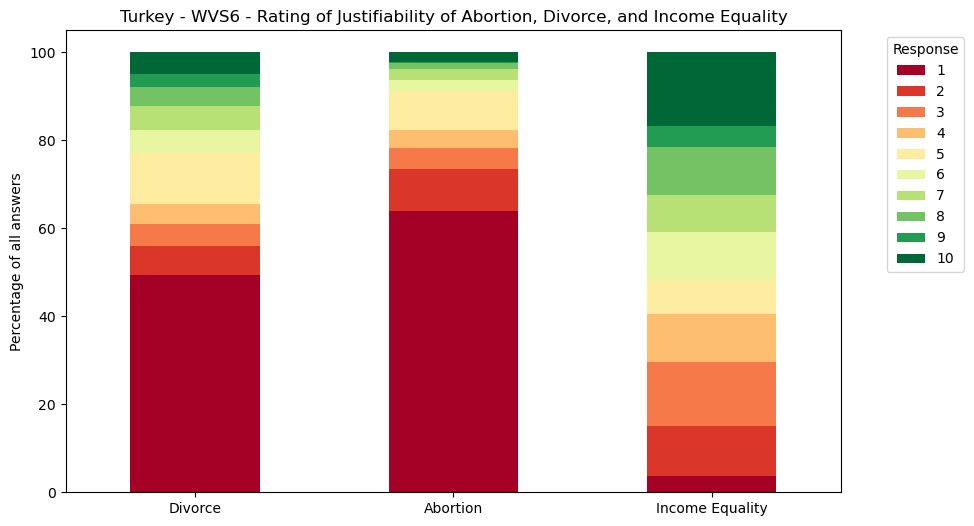

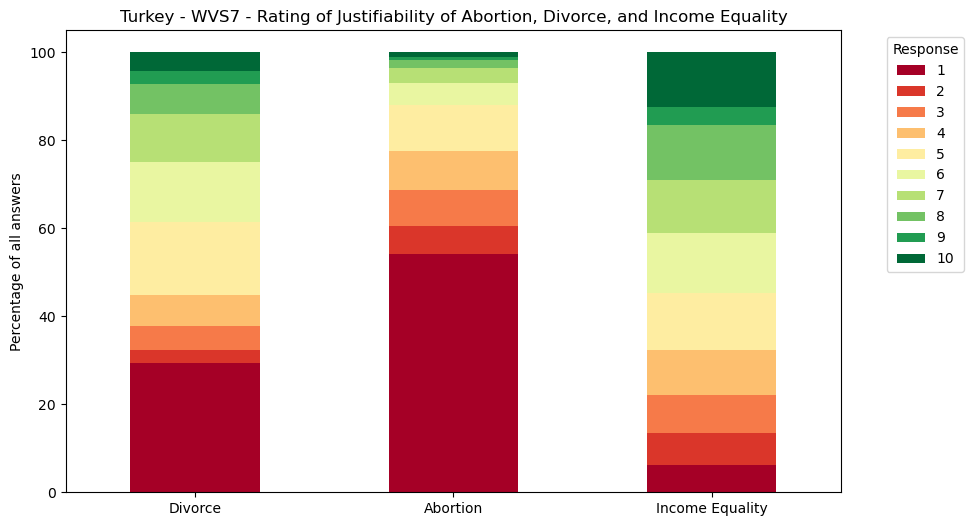

In [10]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Turkey']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Turkey - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


Nigeria

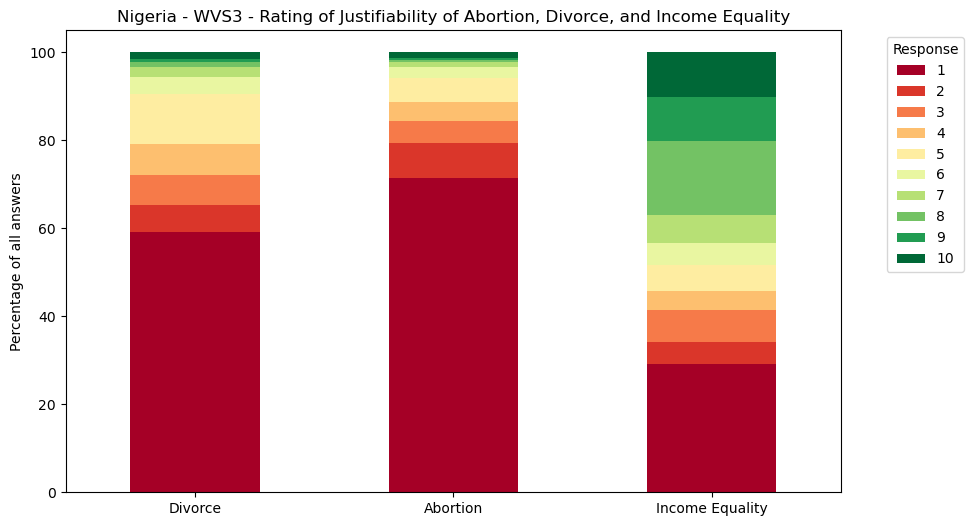

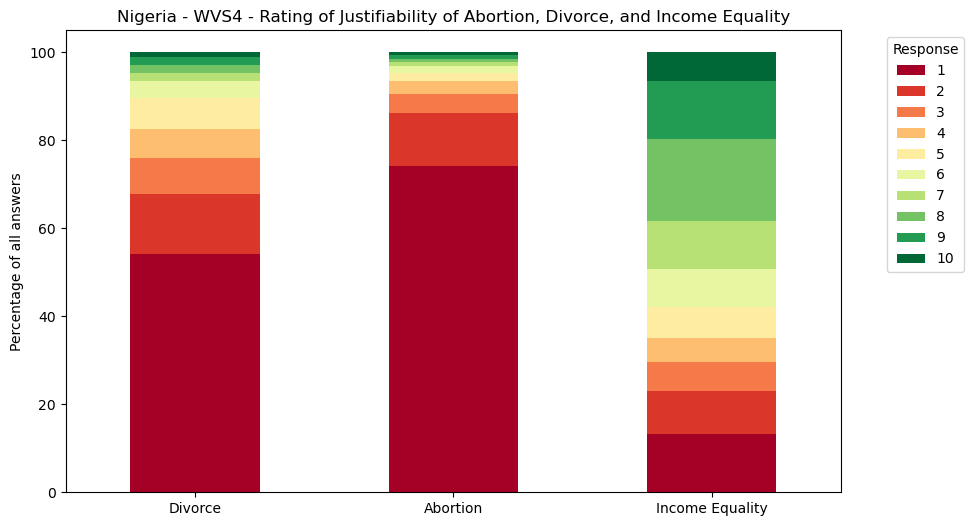

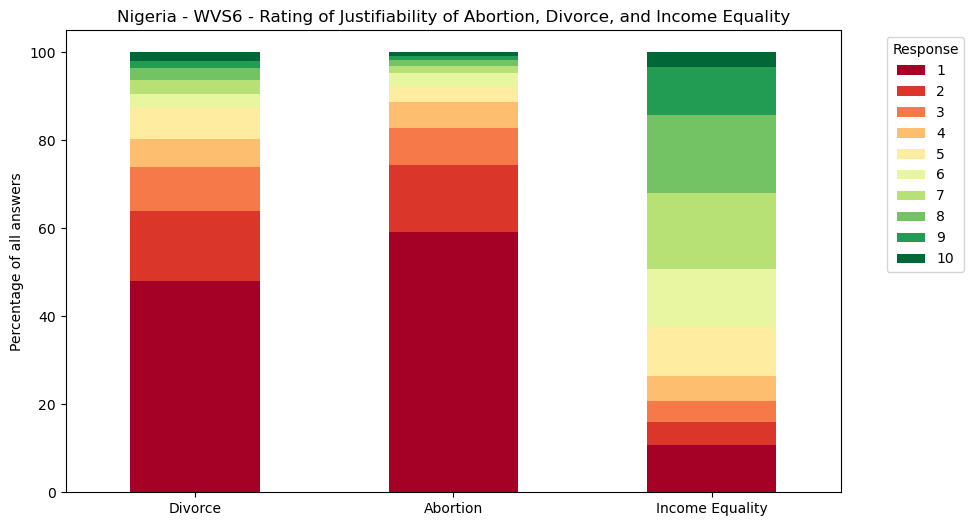

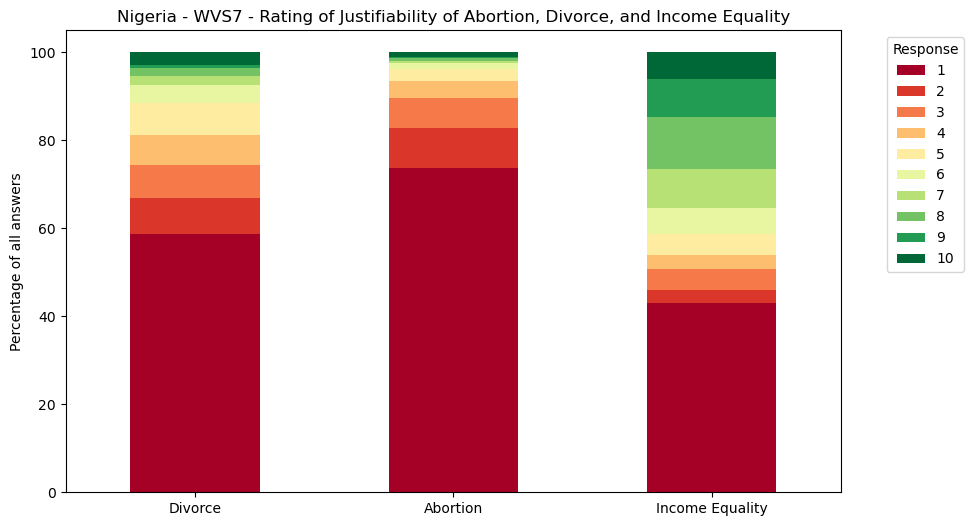

In [11]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Nigeria']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Nigeria - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


Serbia

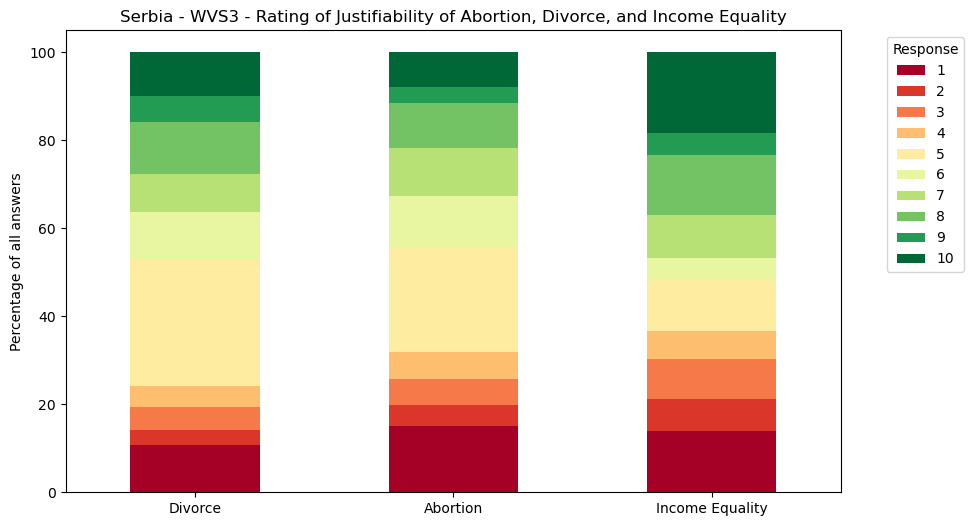

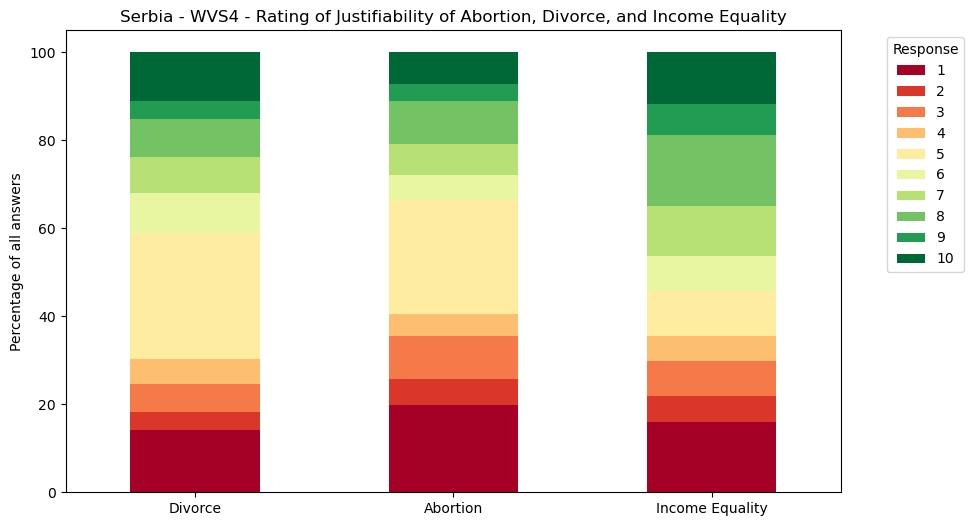

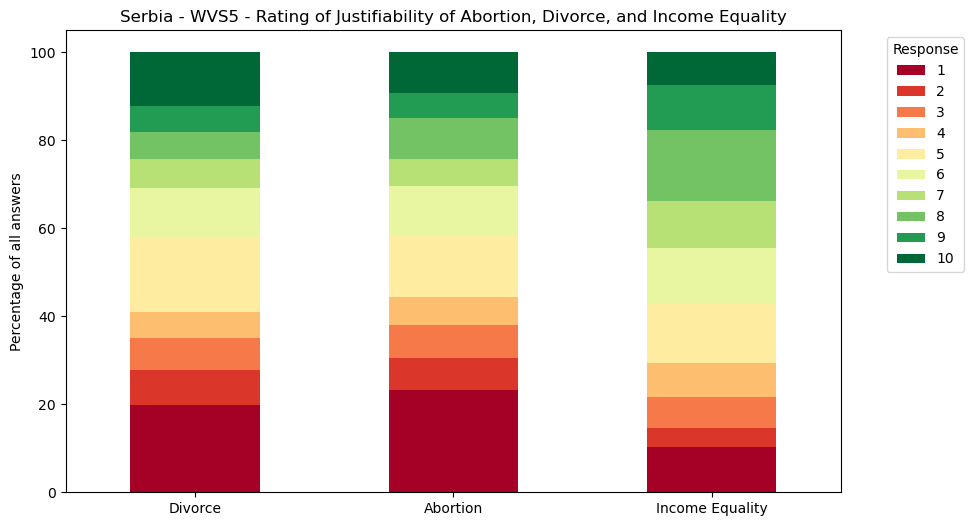

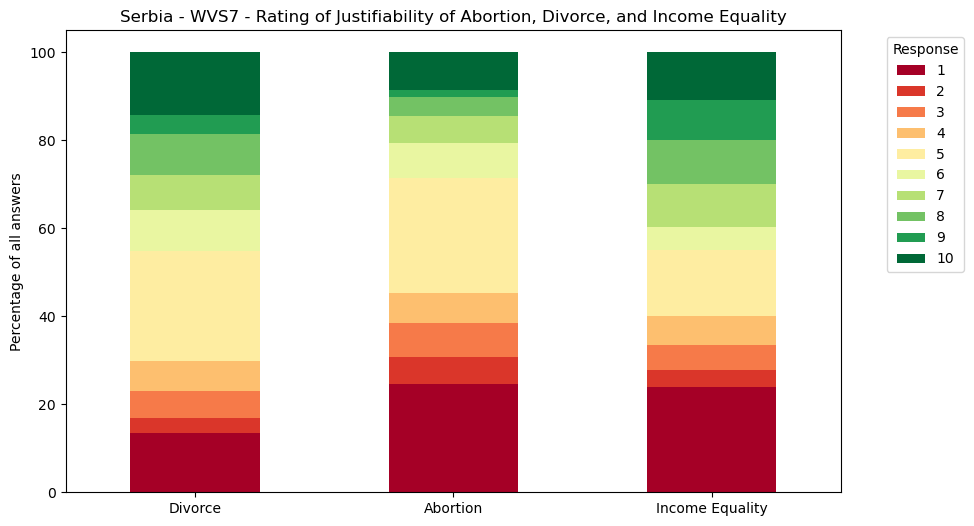

In [13]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Serbia']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Serbia - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()
